In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [74]:
veriler = pd.read_csv('dataset.csv', low_memory=False)
veriler.shape

(218633, 56)

In [75]:
veriler.head(5)

,ilk_Teslimat_Suresi,Son_Teslimat_Suresi,Adres_Dogrulama_Suresi,KT_Gelis_Suresi,Restaurant_Atama_Suresi,Restaurant_Kabul_Suresi,Restoran_Hazirlama_Suresi,Yola_Cikis_Suresi,Yolda_Gecen_Sure,Restaurant_Bekleme_Suresi,...,Yeni_ilk_Restoran_Kabul_Suresi,Yeni_Son_Restaurant_hazirlama_Suresi,Yeni_Yola_Cikarma_Suresi,Yeni_Kurye_Tasima_Suresi,Uctanuca_Teslimat_Suresi,Restaurant_Hedef_Sure,CustomerLat,CustomerLon,RestaurantLat,RestaurantLon
0,49.400000,49.400000,NaN,0.216666,3.350000,1.033333,14.766666,5.783333,24.466666,5.783333,...,1.033333,14.766666,5.783333,24.466666,49.400000,40,41.00166,29.19621,41.01450,29.18064
1,27.866666,27.950000,NaN,0.166666,0.583333,0.583333,6.316666,0.200000,20.183333,0.200000,...,0.583333,6.316666,0.200000,20.183333,27.866666,40,41.01541,29.19533,41.01450,29.18064
2,30.516666,30.583333,0.133333,0.366666,2.566666,0.583333,7.033333,2.150000,18.183333,2.150000,...,0.583333,7.033333,2.150000,18.183333,30.516666,40,41.02884,29.15482,41.01629,29.16255
3,34.466666,34.500000,NaN,0.350000,2.883333,0.666666,3.650000,12.033333,15.233333,12.033333,...,0.666666,3.650000,12.033333,15.233333,34.466666,40,0.00000,0.00000,41.01450,29.18064
4,32.233333,32.350000,NaN,0.200000,0.466666,1.300000,5.033333,15.166666,10.266666,15.166666,...,1.300000,5.033333,15.166666,10.266666,32.233333,40,41.00548,29.19827,41.01450,29.18064


In [76]:
veriler.tail(5)

,ilk_Teslimat_Suresi,Son_Teslimat_Suresi,Adres_Dogrulama_Suresi,KT_Gelis_Suresi,Restaurant_Atama_Suresi,Restaurant_Kabul_Suresi,Restoran_Hazirlama_Suresi,Yola_Cikis_Suresi,Yolda_Gecen_Sure,Restaurant_Bekleme_Suresi,...,Yeni_ilk_Restoran_Kabul_Suresi,Yeni_Son_Restaurant_hazirlama_Suresi,Yeni_Yola_Cikarma_Suresi,Yeni_Kurye_Tasima_Suresi,Uctanuca_Teslimat_Suresi,Restaurant_Hedef_Sure,CustomerLat,CustomerLon,RestaurantLat,RestaurantLon
218628,NaN,NaN,NaN,37.633333,38.033333,1.566666,NaN,NaN,NaN,NaN,...,1.566666,NaN,NaN,NaN,NaN,40,41.00246,29.20115,41.01450,29.18064
218629,NaN,NaN,NaN,0.083333,0.566666,0.750000,NaN,NaN,NaN,NaN,...,0.750000,NaN,NaN,NaN,NaN,40,41.01760,29.13845,41.01629,29.16255
218630,NaN,NaN,3.316666,3.550000,10.133333,0.766666,NaN,NaN,NaN,NaN,...,0.766666,NaN,NaN,NaN,NaN,30,41.03348,29.17736,41.03290,29.17440
218631,NaN,NaN,NaN,0.150000,7.350000,0.816666,8.683333,NaN,NaN,NaN,...,0.816666,8.683333,NaN,NaN,NaN,40,41.01016,29.15458,41.01560,29.17660
218632,72.666666,72.666666,NaN,0.200000,1.383333,2.133333,NaN,NaN,NaN,NaN,...,2.133333,NaN,NaN,NaN,72.666666,40,41.00436,29.18422,41.01450,29.18064


In [77]:
konum = veriler.iloc[:210000,52:56]



In [78]:
sure = veriler.iloc[:210000,47:51]


In [79]:
restoranid = veriler.iloc[:210000,15:16]

In [80]:
packageid = veriler.iloc[:210000,18:19]

In [81]:
kuryeid = veriler.iloc[:210000,21:22]

In [82]:
crme = veriler.iloc[:210000,30:31]

In [83]:
sonuc1 = pd.DataFrame(data=konum, index=range(210000), columns=['CustomerLat','CustomerLon','RestaurantLat','RestaurantLon'])
sonuc2 = pd.DataFrame(data=sure, index=range(210000), columns=['Yeni_Son_Restaurant_hazirlama_Suresi','Yeni_Yola_Cikarma_Suresi','Yeni_Kurye_Tasima_Suresi','Uctanuca_Teslimat_Suresi'])
sonuc3 = pd.DataFrame(data=restoranid, index=range(210000), columns=['RestaurantId'])
sonuc4 = pd.DataFrame(data=packageid, index=range(210000), columns=['PackageId'])
sonuc5 = pd.DataFrame(data=kuryeid, index=range(210000), columns=['Kuryeid'])
sonuc6 = pd.DataFrame(data=crme, index=range(210000), columns=['CRMe_Gelis_Zamani'])

In [84]:
s1 = pd.concat([sonuc1,sonuc2], axis=1)
s2 = pd.concat([s1,sonuc3], axis=1)
s3 = pd.concat([s2,sonuc4], axis=1)
s4 = pd.concat([s3,sonuc5], axis=1)
s5 = pd.concat([s4,sonuc6], axis=1)


In [85]:
from math import radians, cos, sin, asin, sqrt

#lat1,lon1 belongs customer
#lat2,lon2 belongs restaurant

lat1 = s5.iloc[:,0:1].values
lon1 = s5.iloc[:,1:2].values
lat2 = s5.iloc[:,2:3].values
lon2 = s5.iloc[:,3:4].values

pi=22/7
k=[]
p=[]
m=[]
y=[]
dlat=[]
dlon=[]
a=[]
c=[]
r=6371

for i in range(len(lat1)):
    #if lat1[i]!='NULL':
        m.append(lat1[i]*pi/180)
    #if lat2[i]!='NULL':
        y.append(lat2[i]*pi/180)
    #if lon2[i]!='NULL':
        p.append(lon2[i]*pi/180)
    #if lon1[i]!='NULL':
        k.append(lon1[i]*pi/180)
         
for i in range(len(lat1)):
    dlat.append(y[i]-m[i])
    dlon.append(p[i]-k[i])
    
for i in range(len(lat1)):
    a.append(sin(dlat[i]/2)**2+cos(m[i])*cos(y[i])*sin(dlon[i]/2)**2)
    
for i in range(len(lat1)):
    c.append(2*asin(sqrt(a[i])))
distance=[]

for i in range(len(lat1)):
    distance.append(c[i]*r)
    
v=list(range(0,len(distance)))
matrix2=[]
count=0
matrix2 = [[v[i], distance[i]] for i in range(len(v))]
removedindices=[]

for i in range(len(distance)):
    if matrix2[i][1]>5000:
        removedindices.append(i)
        
for i in removedindices:
    matrix2[i][1]=0

for i in range(len(matrix2)):
    matrix2[i][1]=matrix2[i][1]*1.609344 #distance in kilometer

kmdistance=[]
for i in range(len(matrix2)):
    kmdistance.append(matrix2[i][1])

#kmdistance dataframe

km_dataframe = pd.DataFrame(data=kmdistance, index=range(210000), columns=['KmDistance'])

In [86]:
yeni = s5.iloc[:,4:]

In [127]:
son = pd.concat([yeni,km_dataframe], axis=1)
df = son.drop(['PackageId'], axis = 1) 
# df.info()
df.isnull().sum()

Yeni_Son_Restaurant_hazirlama_Suresi    1003
Yeni_Yola_Cikarma_Suresi                1305
Yeni_Kurye_Tasima_Suresi                1230
Uctanuca_Teslimat_Suresi                 832
RestaurantId                               0
Kuryeid                                    7
CRMe_Gelis_Zamani                          0
KmDistance                               146
dtype: int64

In [128]:
df = df.dropna(axis=0, how='all', thresh=1, subset=None, inplace=False)
df = df.drop(removedindices)
df=df.reset_index(drop=True)



In [129]:
df.isnull().sum()

Yeni_Son_Restaurant_hazirlama_Suresi     907
Yeni_Yola_Cikarma_Suresi                1200
Yeni_Kurye_Tasima_Suresi                1135
Uctanuca_Teslimat_Suresi                 769
RestaurantId                               0
Kuryeid                                    7
CRMe_Gelis_Zamani                          0
KmDistance                               146
dtype: int64

<AxesSubplot:xlabel='Kuryeid'>

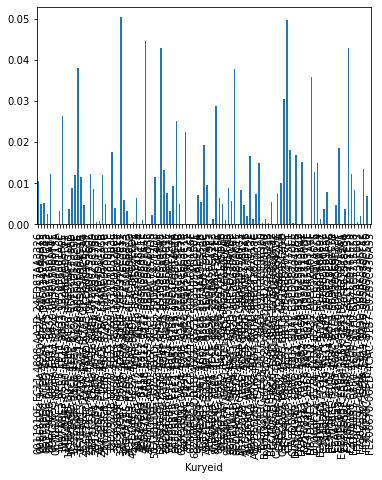

In [130]:
# grouping by frequency
fq = df.groupby('Kuryeid').size()/len(df)   
# mapping values to dataframe
df.loc[:, 'kuryeencode'] = df['Kuryeid'].map(fq)  
# drop original column.
df = df.drop(['Kuryeid'], axis = 1) 
fq.plot.bar(stacked = True)  


In [131]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['RestaurantId'])
df=one_hot_encoded_data


In [132]:
df.shape

(169939, 14)

In [133]:
independent_1 = df.iloc[:, 0:3].values

In [134]:
independent_2 = df.iloc[:, 4:15].values

In [135]:
dependent = df.iloc[:, 3:4].values


In [136]:
independent_2

array([['3/8/2021 13:58', 3.115433611806001, 0.03800775572411277, ..., 1,
        0, 0],
       ['10/18/2020 22:06', 1.9905005452246474, 0.05040043780415326, ...,
        1, 0, 0],
       ['12/28/2020 16:58', 2.477360143607752, 0.049829644754882635, ...,
        0, 1, 0],
       ...,
       ['12/10/2020 18:54', 2.249599849500168, 0.03583050388668875, ...,
        0, 1, 0],
       ['10/5/2020 19:57', 1.49148278990956, 0.014952424105120073, ...,
        1, 0, 0],
       ['3/11/2021 17:20', 3.160271305642034, 0.01675895468373946, ...,
        0, 0, 0]], dtype=object)

In [178]:
sonuc1 = pd.DataFrame(data=independent_1, index=range(169939), columns=['Yeni_Son_Restaurant_hazirlama_Suresi','Yeni_Yola_Cikarma_Suresi','Yeni_Kurye_Tasima_Suresi'])
sonuc2 = pd.DataFrame(data=independent_2, index=range(169939), columns=['CRMe_Gelis_Zamani','KmDistance','kuryeencode','RestaurantId_2F6ED9C0-FB34-E511-9415-005056801A6F','RestaurantId_437B71FB-CFF8-EA11-941F-0050568045BB','RestaurantId_5881BFDF-A4C4-E311-9400-0050568027BF','RestaurantId_759CB3BD-64D6-E611-9429-005056801A6F','RestaurantId_7FED6034-9C99-E511-9413-005056800F4E','RestaurantId_8C258EF2-DA4D-E811-941D-005056800F4E','RestaurantId_BC29B49A-62D6-E611-941F-005056800C1E',])
sonuc3 = pd.DataFrame(data=dependent, index=range(169939), columns=['Uctanuca_Teslimat_Suresi'])
independent = pd.concat([sonuc1,sonuc2], axis=1)
dependent=sonuc3
independent

,Yeni_Son_Restaurant_hazirlama_Suresi,Yeni_Yola_Cikarma_Suresi,Yeni_Kurye_Tasima_Suresi,CRMe_Gelis_Zamani,KmDistance,kuryeencode,RestaurantId_2F6ED9C0-FB34-E511-9415-005056801A6F,RestaurantId_437B71FB-CFF8-EA11-941F-0050568045BB,RestaurantId_5881BFDF-A4C4-E311-9400-0050568027BF,RestaurantId_759CB3BD-64D6-E611-9429-005056801A6F,RestaurantId_7FED6034-9C99-E511-9413-005056800F4E,RestaurantId_8C258EF2-DA4D-E811-941D-005056800F4E,RestaurantId_BC29B49A-62D6-E611-941F-005056800C1E
0,14.766666,5.783333,24.466666,3/8/2021 13:58,3.115434,0.038008,0,0,0,0,1,0,0
1,6.316666,0.200000,20.183333,10/18/2020 22:06,1.990501,0.0504,0,0,0,0,1,0,0
2,7.033333,2.150000,18.183333,12/28/2020 16:58,2.47736,0.04983,0,0,0,0,0,1,0
3,5.033333,15.166666,10.266666,6/24/2021 18:41,2.876955,0.0504,0,0,0,0,1,0,0
4,6.800000,3.600000,17.883333,1/8/2021 22:11,2.701609,0.0504,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169934,0.333333,7.983333,14.450000,3/23/2021 21:07,0.471745,0.01347,0,0,0,0,1,0,0
169935,9.383333,0.966666,11.433333,10/16/2020 15:06,0.039959,0.016906,0,0,1,0,0,0,0
169936,4.350000,5.850000,17.066666,12/10/2020 18:54,2.2496,0.035831,0,0,0,0,0,1,0
169937,6.766666,0.050000,7.500000,10/5/2020 19:57,1.491483,0.014952,0,0,0,0,1,0,0


In [179]:
X=independent
y=dependent


In [180]:
X["CRMe_Gelis_Zamani"]=pd.to_datetime(X["CRMe_Gelis_Zamani"])

for index, row in X.iterrows():   
    if(8<=row['CRMe_Gelis_Zamani'].hour<13):
        X.at[index,'CRMe_Gelis_Zamani'] = 2
    elif(13<=row['CRMe_Gelis_Zamani'].hour<17):
        X.at[index,'CRMe_Gelis_Zamani'] =3
    elif(17<=row['CRMe_Gelis_Zamani'].hour<24):
        X.at[index,'CRMe_Gelis_Zamani'] =4
    elif(0<=row['CRMe_Gelis_Zamani'].hour<8):
        X.at[index,'CRMe_Gelis_Zamani'] =1      
        
    
X['CRMe_Gelis_Zamani']=X['CRMe_Gelis_Zamani'].astype(int)

X.tail(30)


,Yeni_Son_Restaurant_hazirlama_Suresi,Yeni_Yola_Cikarma_Suresi,Yeni_Kurye_Tasima_Suresi,CRMe_Gelis_Zamani,KmDistance,kuryeencode,RestaurantId_2F6ED9C0-FB34-E511-9415-005056801A6F,RestaurantId_437B71FB-CFF8-EA11-941F-0050568045BB,RestaurantId_5881BFDF-A4C4-E311-9400-0050568027BF,RestaurantId_759CB3BD-64D6-E611-9429-005056801A6F,RestaurantId_7FED6034-9C99-E511-9413-005056800F4E,RestaurantId_8C258EF2-DA4D-E811-941D-005056800F4E,RestaurantId_BC29B49A-62D6-E611-941F-005056800C1E
169909,4.800000,5.366666,6.600000,4,1.526301,0.035831,0,0,0,0,0,1,0
169910,11.550000,0.050000,11.616666,4,1.854028,0.011639,1,0,0,0,0,0,0
169911,5.016666,7.200000,8.583333,4,0.86805,0.003854,0,0,0,0,1,0,0
169912,7.600000,8.816666,5.766666,4,0.543338,0.042898,0,0,0,0,1,0,0
169913,10.216666,0.733333,11.416666,3,1.476425,0.011639,0,0,0,0,1,0,0
169914,10.800000,0.050000,7.666666,4,1.43979,0.035831,0,0,0,0,0,1,0
169915,3.550000,3.266666,22.316666,4,1.989175,0.014952,0,0,0,0,1,0,0
169916,5.866666,0.050000,24.983333,4,0.692391,0.04983,0,0,0,0,0,0,1
169917,8.133333,1.316666,24.650000,4,2.565135,0.011516,0,0,0,0,1,0,0
169918,6.333333,18.133333,34.183333,4,2.50033,0.003854,1,0,0,0,0,0,0


In [181]:
independent.Yeni_Yola_Cikarma_Suresi.loc[(independent.Yeni_Yola_Cikarma_Suresi < 0) ] = np.nan
independent.Yeni_Son_Restaurant_hazirlama_Suresi.loc[(independent.Yeni_Son_Restaurant_hazirlama_Suresi < 0) ] = np.nan
independent.Yeni_Kurye_Tasima_Suresi.loc[(independent.Yeni_Kurye_Tasima_Suresi < 0) ] = np.nan
independent.KmDistance.loc[(independent.KmDistance < 0) ] = np.nan
independent.KmDistance.loc[(independent.KmDistance >50) ] = np.nan
dependent.Uctanuca_Teslimat_Suresi.loc[(dependent.Uctanuca_Teslimat_Suresi < 0) ] = np.nan


C:\Users\iberk\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [182]:
df_mean_1 = independent["Yeni_Son_Restaurant_hazirlama_Suresi"].mean()
df_mean_2 = independent["Yeni_Yola_Cikarma_Suresi"].mean()
df_mean_3 = independent["Yeni_Kurye_Tasima_Suresi"].mean()
df_mean_4 = independent["KmDistance"].mean()
df_mean_1



9.540668848933189

In [183]:
independent['Yeni_Son_Restaurant_hazirlama_Suresi'] = independent['Yeni_Son_Restaurant_hazirlama_Suresi'].replace('NaN', np.nan).fillna(0).astype(float)
independent['Yeni_Yola_Cikarma_Suresi'] = independent['Yeni_Yola_Cikarma_Suresi'].replace('NaN', np.nan).fillna(0).astype(float)
independent['Yeni_Kurye_Tasima_Suresi'] = independent['Yeni_Kurye_Tasima_Suresi'].replace('NaN', np.nan).fillna(0).astype(float)
independent['KmDistance'] = independent['KmDistance'].replace('NaN', np.nan).fillna(df_mean_4).astype(float)
independent['kuryeencode'] = independent['kuryeencode'].replace('NaN', np.nan).fillna(0).astype(float)
independent['CRMe_Gelis_Zamani'] = independent['CRMe_Gelis_Zamani'].replace('NaN', np.nan).fillna(0).astype(float)
independent['RestaurantId_2F6ED9C0-FB34-E511-9415-005056801A6F'] = independent['RestaurantId_2F6ED9C0-FB34-E511-9415-005056801A6F'].replace('NaN', np.nan).fillna(0).astype(float)
independent['RestaurantId_437B71FB-CFF8-EA11-941F-0050568045BB'] = independent['RestaurantId_437B71FB-CFF8-EA11-941F-0050568045BB'].replace('NaN', np.nan).fillna(0).astype(float)
independent['RestaurantId_5881BFDF-A4C4-E311-9400-0050568027BF'] = independent['RestaurantId_5881BFDF-A4C4-E311-9400-0050568027BF'].replace('NaN', np.nan).fillna(0).astype(float)
independent['RestaurantId_759CB3BD-64D6-E611-9429-005056801A6F'] = independent['RestaurantId_759CB3BD-64D6-E611-9429-005056801A6F'].replace('NaN', np.nan).fillna(0).astype(float)
independent['RestaurantId_7FED6034-9C99-E511-9413-005056800F4E'] = independent['RestaurantId_7FED6034-9C99-E511-9413-005056800F4E'].replace('NaN', np.nan).fillna(0).astype(float)
independent['RestaurantId_8C258EF2-DA4D-E811-941D-005056800F4E'] = independent['RestaurantId_8C258EF2-DA4D-E811-941D-005056800F4E'].replace('NaN', np.nan).fillna(0).astype(float)
independent['RestaurantId_BC29B49A-62D6-E611-941F-005056800C1E'] = independent['RestaurantId_BC29B49A-62D6-E611-941F-005056800C1E'].replace('NaN', np.nan).fillna(0).astype(float)

In [184]:
dependent['Uctanuca_Teslimat_Suresi'] = dependent['Uctanuca_Teslimat_Suresi'].replace('NaN', np.nan).fillna(0).astype(float)

In [185]:
dependent.shape


(169939, 1)

In [186]:
independent.shape

(169939, 13)

In [187]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.15, random_state=101)

In [188]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)

Random Forest R2 degeri:
75.50480609663161


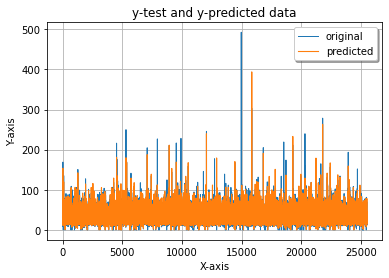

0.7550480609663162


In [189]:
Y=y_test.values
X=x_test.values
X1=x_train.values
Y1=y_train.values
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 100, random_state=10) 
rf_reg.fit(X1,Y1.ravel())


ypred = rf_reg.predict(X)

print("Random Forest R2 degeri:")
print(r2_score(Y, ypred)*100 )


x_ax = range(len(Y.ravel()))
plt.plot(x_ax, Y, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.savefig("fig.png",
            dpi =1000,
            bbox_inches ="tight",
            pad_inches = 0.1,
            transparent = False,
            facecolor ="w",
            edgecolor ='b',
            orientation ='landscape')
plt.show() 
print(r2_score(Y.ravel(),ypred) )

In [192]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)



ValueError: Found input variables with inconsistent numbers of samples: [25491, 169939]

In [193]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [194]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [[ 8.06538766  6.7752551  10.00746839 -0.03005775  0.13461514  0.22620312
  -0.16372078 -0.038272   -0.11578025  0.20455733 -0.16112517  0.51749604
  -0.15465264]]


In [195]:
prediction = regressor.predict(X_test)


Text(0, 0.5, 'Predicted Y')

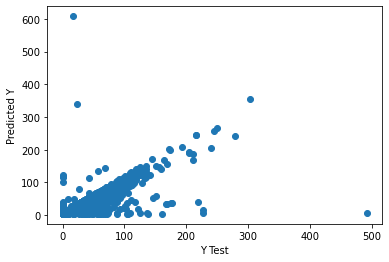

In [196]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [197]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5.597101760629999
MSE: 93.40853298675981
RMSE: 9.664808998979742


C:\Users\iberk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


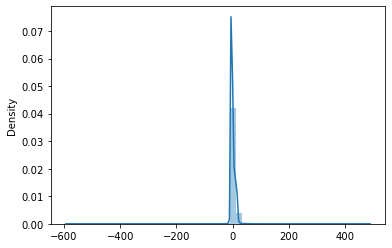

In [198]:
import seaborn as sns
sns.distplot((y_test-prediction),bins=50);

In [199]:
# one_hot_encoded_data = pd.get_dummies(X, columns = ['CRMe_Gelis_Zamani'])
# X=one_hot_encoded_data
# X